In [5]:
df_full <- read.csv('/df_full.csv')
head(df_full)

,cc_Sx_digestive,cc_Sx_cardio_lymph,cc_Sx_eyes_ears,cc_Sx_neuro,cc_Sx_respiratory,cc_Sx_genitourinary,cc_Therapy_specific,cc_Sx_general,cc_Sx_psych,cc_Poisoning,⋯,Z208_yes,Z208_no,Z770_yes,Z770_no,n_med_er,n_med_dis,med_binary,disposit,patcode,hospcode
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>
1,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,5,2,1,retreffu,1,34
2,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,2,2,1,retreffu,2,34
3,0,1,1,1,0,0,0,0,0,0,⋯,0,0,0,0,0,3,1,retreffu,3,34
4,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,1,0,1,nodisp,4,34
5,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,retreffu,5,34
6,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,1,0,1,nodisp,6,34


In [2]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [3]:
install.packages("MLmetrics")
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




In [4]:
library(tidyverse)
library(caret)
library(nnet)
library(MLmetrics)
library(dplyr)
library(glmnet)
library(e1071)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘MLmetrics’


The following objects are masked from ‘package:caret’:

    MAE, RMSE


The following object is masked from ‘package:base’:

    Recall


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



In [7]:
na_summary <- colSums(is.na(df_full))
na_summary[na_summary > 0]
print(na_summary[na_summary > 0])

named numeric(0)

named numeric(0)


In [8]:
table(df_full$disposit)


admithos   dieded      doa     lbtc  leftama     lwbs   nodisp     nofu 
    1928       30        9      200      228      320      106     1202 
  obsdis   obshos  othdisp retreffu  retrned   trannh  tranoth tranpsyc 
     202      172      225     8898     2053      100      204      148 

In [20]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




Warning message:
“from glmnet C++ code (error code -19); Convergence for 19th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”
Warning message:
“from glmnet C++ code (error code -19); Convergence for 19th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”
Warning message:
“from glmnet C++ code (error code -19); Convergence for 19th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”
Warning message:
“from glmnet C++ code (error code -20); Convergence for 20th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”
Warning message:
“from glmnet C++ code (error code -18); Convergence for 18th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”
Warning message:
“from glmnet C++ code (error code -20); Convergence for 20th lambda value not reached after maxit=100000 iterations; s

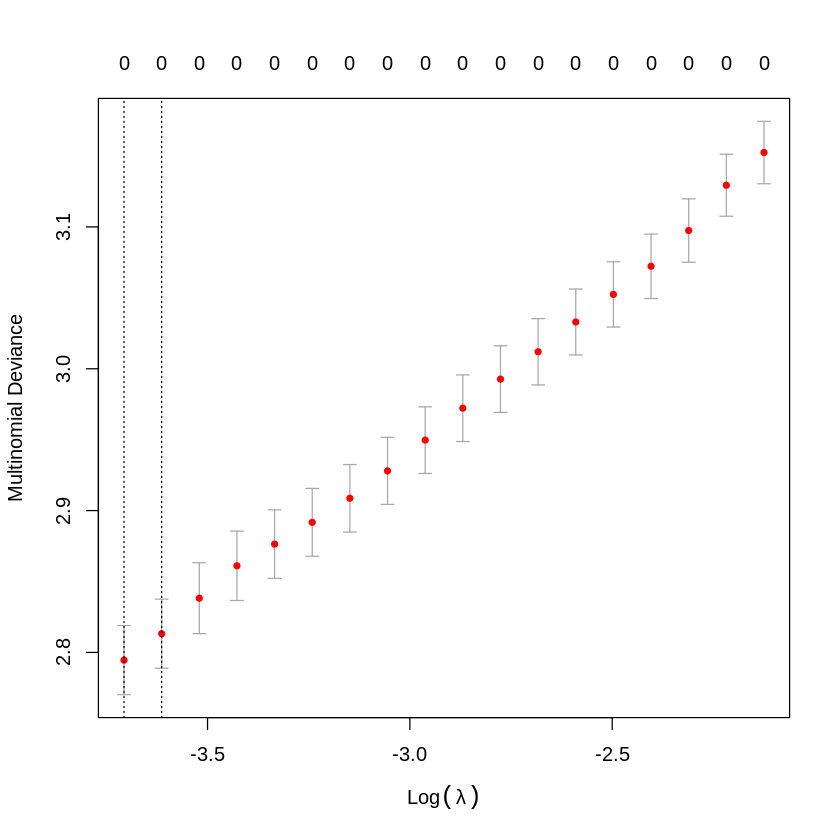

In [9]:
df_full$disposit <- as.factor(df_full$disposit)
y <- as.factor(df_full$disposit)
X <- df_full %>% select(-disposit) %>% as.matrix()

set.seed(123)
cv_lasso <- cv.glmnet(X, y, family = "multinomial", alpha = 1)

plot(cv_lasso)


In [20]:
cv_lasso$lambda.1se

[1] 0.02695936

In [21]:
coefs <- coef(cv_lasso, s = 0.0269593573879558)

non_zero_features <- lapply(coefs, function(mat) {
  rownames(mat)[which(mat != 0 & rownames(mat) != "(Intercept)")]
})

for (class in names(non_zero_features)) {
  cat("\n🟢 Class:", class, "\n")
  print(non_zero_features[[class]])
}



🟢 Class: admithos 
 [1] "ARREMS"                 "BPAP"                   "IVFLUIDS"              
 [4] "CEBVD"                  "CKD"                    "CHF"                   
 [7] "CAD"                    "DIABTYP2"               "HTN"                   
[10] "NOCHRON"                "LOV"                    "IMMEDR_Emergent"       
[13] "AGER_75.years.and.over" "PAYTYPER_Medicare"      "A419_no"               
[16] "n_med_er"              

🟢 Class: dieded 
character(0)

🟢 Class: doa 
character(0)

🟢 Class: lbtc 
character(0)

🟢 Class: leftama 
character(0)

🟢 Class: lwbs 
[1] "med_binary"

🟢 Class: nodisp 
character(0)

🟢 Class: nofu 
[1] "edptor"

🟢 Class: obsdis 
character(0)

🟢 Class: obshos 
character(0)

🟢 Class: othdisp 
[1] "emred_unk" "hhsmue_na"

🟢 Class: retreffu 
 [1] "cc_Sx_psych"                                                      
 [2] "cc_Sx_musculoskeletal"                                            
 [3] "ARREMS"                                                 

In [28]:
y_pred <- predict(cv_lasso, newx = X, s = cv_lasso$lambda.1se, type = "class")
table(y_pred)

y_pred
admithos retreffu  retrned 
     625    14998      402 

In [32]:
y_pred <- as.factor(as.vector(y_pred))

confusion_matrix <- caret::confusionMatrix(y_pred, y)
print(confusion_matrix)

Warning message in levels(reference) != levels(data):
“longer object length is not a multiple of shorter object length”
Warning message in confusionMatrix.default(y_pred, y):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction admithos dieded  doa lbtc leftama lwbs nodisp nofu obsdis obshos
  admithos      403      9    0    0       5    0      0   12     42     36
  dieded          0      0    0    0       0    0      0    0      0      0
  doa             0      0    0    0       0    0      0    0      0      0
  lbtc            0      0    0    0       0    0      0    0      0      0
  leftama         0      0    0    0       0    0      0    0      0      0
  lwbs            0      0    0    0       0    0      0    0      0      0
  nodisp          0      0    0    0       0    0      0    0      0      0
  nofu            0      0    0    0       0    0      0    0      0      0
  obsdis          0      0    0    0       0    0      0    0      0      0
  obshos          0      0    0    0       0    0      0    0      0      0
  othdisp         0      0    0    0       0    0      0    0      0      0
  retreffu     1468     21    8  20

In [34]:
df_group <- read_csv("/df_grouping.csv")
head(df_group)

Rows: 6757 Columns: 762
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): arrtime, disposit, disp_group
dbl (759): cc_Sx_digestive, cc_Sx_cardio_lymph, cc_Sx_eyes_ears, cc_Sx_neuro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cc_Sx_digestive,cc_Sx_cardio_lymph,cc_Sx_eyes_ears,cc_Sx_neuro,cc_Sx_respiratory,cc_Sx_genitourinary,cc_Therapy_specific,cc_Sx_general,cc_Sx_psych,cc_Poisoning,⋯,Z208_no,Z770_yes,Z770_no,n_med_er,n_med_dis,med_binary,disposit,patcode,hospcode,disp_group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,1,1,admithos,12,34,admit
0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,nofu,14,34,discharge
0,0,0,0,0,1,0,1,0,0,⋯,0,0,0,0,0,0,lbtc,20,34,left
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,2,0,1,tranoth,28,34,transfer
0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,1,1,1,admithos,39,34,admit
0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,1,6,1,admithos,41,34,admit


In [36]:
table(df_group$disposit)


admithos     lbtc  leftama     lwbs     nofu   obsdis   obshos  retrned 
    1928      200      228      320     1202      202      172     2053 
  trannh  tranoth tranpsyc 
     100      204      148 

In [37]:
df_group$disposit <- as.factor(df_group$disposit)
df_group <- df_group[ , !(names(df_group) %in% "disp_group")]
head(df_group)


cc_Sx_digestive,cc_Sx_cardio_lymph,cc_Sx_eyes_ears,cc_Sx_neuro,cc_Sx_respiratory,cc_Sx_genitourinary,cc_Therapy_specific,cc_Sx_general,cc_Sx_psych,cc_Poisoning,⋯,Z208_yes,Z208_no,Z770_yes,Z770_no,n_med_er,n_med_dis,med_binary,disposit,patcode,hospcode
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,1,1,admithos,12,34
0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,nofu,14,34
0,0,0,0,0,1,0,1,0,0,⋯,0,0,0,0,0,0,0,lbtc,20,34
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,2,0,1,tranoth,28,34
0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,1,1,1,admithos,39,34
0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,1,6,1,admithos,41,34


Warning message:
“from glmnet C++ code (error code -31); Convergence for 31th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”
Warning message:
“from glmnet C++ code (error code -31); Convergence for 31th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”
Warning message:
“from glmnet C++ code (error code -31); Convergence for 31th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”
Warning message:
“from glmnet C++ code (error code -31); Convergence for 31th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”


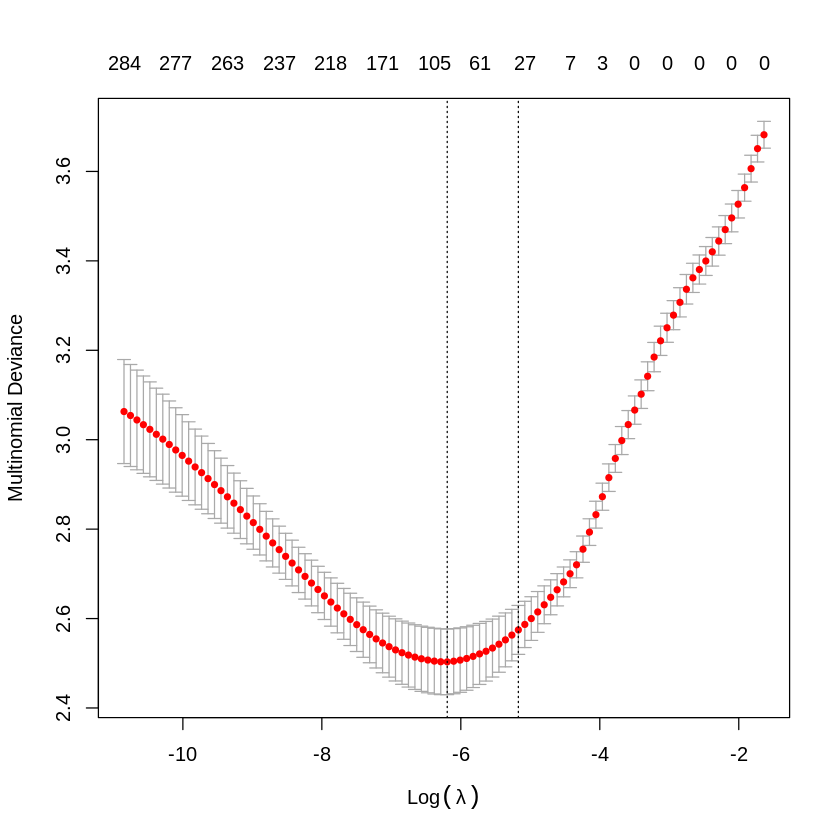

In [38]:
y <- as.factor(df_group$disposit)
X <- df_group %>% select(-disposit) %>% as.matrix()

set.seed(123)
cv_lasso <- cv.glmnet(X, y, family = "multinomial", alpha = 1)

plot(cv_lasso)

In [42]:
coefs <- coef(cv_lasso, s = cv_lasso$lambda.min)

non_zero_features <- lapply(coefs, function(mat) {
  rownames(mat)[which(mat != 0 & rownames(mat) != "(Intercept)")]
})

for (class in names(non_zero_features)) {
  cat("\n🟢 Class:", class, "\n")
  print(non_zero_features[[class]])
}



🟢 Class: admithos 
  [1] "cc_Sx_eyes_ears"                                                  
  [2] "cc_Sx_neuro"                                                      
  [3] "cc_Therapy_specific"                                              
  [4] "cc_Sx_psych"                                                      
  [5] "cc_Poisoning"                                                     
  [6] "cc_Test_results"                                                  
  [7] "cc_Dx_tests"                                                      
  [8] "cc_Periop_care"                                                   
  [9] "cc_Blood_dz"                                                      
 [10] "cc_Respiratory_dz"                                                
 [11] "cc_Mental_dz"                                                     
 [12] "cc_Ear_dz"                                                        
 [13] "cc_Progress_visit"                                                
 [14] "cc_Exam_gen

In [43]:
y_pred <- predict(cv_lasso, newx = X, s = cv_lasso$lambda.1se, type = "class")
table(y_pred)

y_pred
admithos     lbtc  leftama     lwbs     nofu   obsdis   obshos  retrned 
    2503        4       11      284     1283       17       11     2516 
  trannh  tranoth tranpsyc 
      22       34       72 

In [44]:
y_pred <- as.factor(as.vector(y_pred))

confusion_matrix <- caret::confusionMatrix(y_pred, y)
print(confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction admithos lbtc leftama lwbs nofu obsdis obshos retrned trannh tranoth
  admithos     1570   34      56   16  129    141    136     180     74     121
  lbtc            1    3       0    0    0      0      0       0      0       0
  leftama         0    0       9    0    2      0      0       0      0       0
  lwbs           19   36      23  145   25      2      1      17      1       9
  nofu          113   63      76   95  726     15      8     144      2      15
  obsdis          4    0       0    2    0      9      1       0      0       0
  obshos          0    0       0    0    0      4      7       0      0       0
  retrned       198   62      61   60  315     27     18    1698      8      39
  trannh          2    0       0    0    2      0      0       2     15       1
  tranoth         8    0       2    0    0      2      0       4      0      18
  tranpsyc       13    2       1    2    3      2      1       8   

In [5]:
df_group <- read_csv("/df_grouping.csv")
head(df_group)

Rows: 6757 Columns: 762
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): arrtime, disposit, disp_group
dbl (759): cc_Sx_digestive, cc_Sx_cardio_lymph, cc_Sx_eyes_ears, cc_Sx_neuro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cc_Sx_digestive,cc_Sx_cardio_lymph,cc_Sx_eyes_ears,cc_Sx_neuro,cc_Sx_respiratory,cc_Sx_genitourinary,cc_Therapy_specific,cc_Sx_general,cc_Sx_psych,cc_Poisoning,⋯,Z208_no,Z770_yes,Z770_no,n_med_er,n_med_dis,med_binary,disposit,patcode,hospcode,disp_group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,1,1,admithos,12,34,admit
0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,nofu,14,34,discharge
0,0,0,0,0,1,0,1,0,0,⋯,0,0,0,0,0,0,lbtc,20,34,left
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,2,0,1,tranoth,28,34,transfer
0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,1,1,1,admithos,39,34,admit
0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,1,6,1,admithos,41,34,admit


In [6]:
df_group$disp_group <- as.factor(df_group$disp_group)
df_group <- df_group[ , !(names(df_group) %in% "disposit")]
head(df_group)

cc_Sx_digestive,cc_Sx_cardio_lymph,cc_Sx_eyes_ears,cc_Sx_neuro,cc_Sx_respiratory,cc_Sx_genitourinary,cc_Therapy_specific,cc_Sx_general,cc_Sx_psych,cc_Poisoning,⋯,Z208_yes,Z208_no,Z770_yes,Z770_no,n_med_er,n_med_dis,med_binary,patcode,hospcode,disp_group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,1,1,12,34,admit
0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,14,34,discharge
0,0,0,0,0,1,0,1,0,0,⋯,0,0,0,0,0,0,0,20,34,left
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,2,0,1,28,34,transfer
0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,1,1,1,39,34,admit
0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,1,6,1,41,34,admit


In [7]:
table(df_group$disp_group)


    admit discharge      left  returned  transfer 
     2302      1202       748      2053       452 

Warning message:
“from glmnet C++ code (error code -32); Convergence for 32th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”
Warning message:
“from glmnet C++ code (error code -32); Convergence for 32th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”
Warning message:
“from glmnet C++ code (error code -32); Convergence for 32th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”


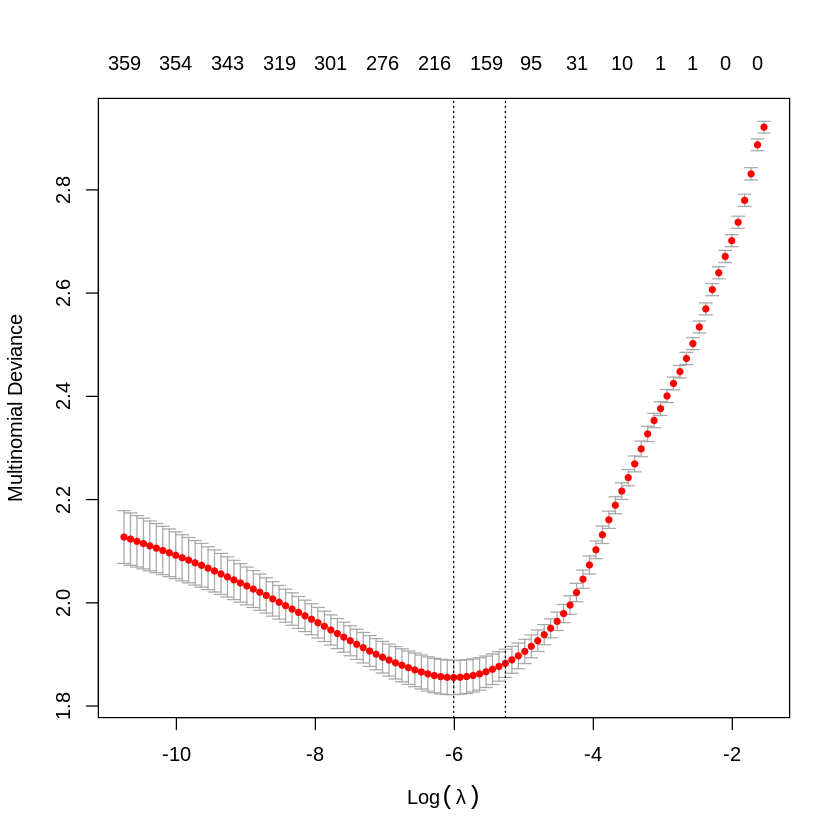

In [23]:
y <- as.factor(df_group$disp_group)
X <- df_group %>% select(-disp_group) %>% as.matrix()

set.seed(123)
cv_lasso <- cv.glmnet(X, y, family = "multinomial", alpha = 1)

plot(cv_lasso)

In [24]:
y_pred <- predict(cv_lasso, newx = X, s = cv_lasso$lambda.min, type = "class")
table(y_pred)

y_pred
    admit discharge      left  returned  transfer 
     2563      1056       661      2284       193 

In [25]:
y_pred <- as.factor(as.vector(y_pred))

confusion_matrix <- caret::confusionMatrix(y_pred, y)
print(confusion_matrix)

Confusion Matrix and Statistics

           Reference
Prediction  admit discharge left returned transfer
  admit      1942       126   97      197      201
  discharge    89       725   95      121       26
  left         47        90  442       51       31
  returned    190       253  112     1671       58
  transfer     34         8    2       13      136

Overall Statistics
                                          
               Accuracy : 0.7275          
                 95% CI : (0.7168, 0.7381)
    No Information Rate : 0.3407          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6255          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: admit Class: discharge Class: left Class: returned
Sensitivity                0.8436           0.6032     0.59091          0.8139
Specificity                0.8606           0.9404  

In [26]:
coefs <- coef(cv_lasso, s = cv_lasso$lambda.min)
non_zero_features <- lapply(coefs, function(mat) {
  rownames(mat)[which(mat != 0 & rownames(mat) != "(Intercept)")]
})

for (class in names(non_zero_features)) {
  cat("\n🟢 Class:", class, "\n")
  print(non_zero_features[[class]])
}


🟢 Class: admit 
  [1] "cc_Sx_eyes_ears"                           
  [2] "cc_Sx_neuro"                               
  [3] "cc_Therapy_specific"                       
  [4] "cc_Sx_general"                             
  [5] "cc_Sx_psych"                               
  [6] "cc_Poisoning"                              
  [7] "cc_Sx_skin_nails_hair"                     
  [8] "cc_Injury_cause_status"                    
  [9] "cc_Test_results"                           
 [10] "cc_Exam_special"                           
 [11] "cc_Respiratory_dz"                         
 [12] "cc_Mental_dz"                              
 [13] "cc_Ear_dz"                                 
 [14] "cc_Exam_general"                           
 [15] "cc_Circulatory_dz"                         
 [16] "cc_Infectious_dz"                          
 [17] "cc_Neoplasms"                              
 [18] "cc_Nervous_dz"                             
 [19] "cc_Med_counseling"                         
 [20] "cc_Admi

Feature selection and Modeling

In [31]:
selected_features <- unique(unlist(non_zero_features))

length(selected_features)
selected_features

[1] 515

[1] "cc_Sx_eyes_ears"                                                  
  [2] "cc_Sx_neuro"                                                      
  [3] "cc_Therapy_specific"                                              
  [4] "cc_Sx_general"                                                    
  [5] "cc_Sx_psych"                                                      
  [6] "cc_Poisoning"                                                     
  [7] "cc_Sx_skin_nails_hair"                                            
  [8] "cc_Injury_cause_status"                                           
  [9] "cc_Test_results"                                                  
 [10] "cc_Exam_special"                                                  
 [11] "cc_Respiratory_dz"                                                
 [12] "cc_Mental_dz"                                                     
 [13] "cc_Ear_dz"                                                        
 [14] "cc_Exam_general"                                                  
 [15] "cc_Circulatory_dz"                                                
 [16] "cc_Infectious_dz"                                                 
 [17] "cc_Neoplasms"                                                     
 [18] "cc_Nervous_dz"                                                    
 [19] "cc_Med_counseling"                                                
 [20] "cc_Administrative"                                                
 [21] "cc_Social_counseling"                                             
 [22] "cc_Preventive"                                                    
 [23] "cc_sum"                                                           
 [24] "ARREMS"                                                           
 [25] "PROC"                                                             
 [26] "BPAP"                                                             
 [27] "BLADCATH"                                                         
 [28] "ENDOINT"                                                          
 [29] "IVFLUIDS"                                                         
 [30] "LUMBAR"                                                           
 [31] "NEBUTHER"                                                         
 [32] "PELVIC"                                                           
 [33] "SUTURE"                                                           
 [34] "ETOHAB"                                                           
 [35] "ASTHMA"                                                           
 [36] "CANCER"                                                           
 [37] "CEBVD"                                                            
 [38] "CKD"                                                              
 [39] "COPD"                                                             
 [40] "CHF"                                                              
 [41] "DEPRN"                                                            
 [42] "DIABTYP2"                                                         
 [43] "ESRD"                                                             
 [44] "EDHIV"                                                            
 [45] "HYPLIPID"                                                         
 [46] "HTN"                                                              
 [47] "OBESITY"                                                          
 [48] "OSA"                                                              
 [49] "SUBSTAB"                                                          
 [50] "NOCHRON"                                                          
 [51] "MSA"                                                              
 [52] "region_northeast"                                                 
 [53] "region_south"                                                     
 [54] "emred_unk"                                                        
 [55] 

In [8]:
selected_features_df <- data.frame(feature = selected_features)

write.csv(selected_features_df, file = "/selected_features.csv", row.names = FALSE)

head(selected_features_df)

ERROR: Error: object 'selected_features' not found


In [17]:
selected_features <- read_csv("/selected_features.csv")$feature
head(selected_features)

Rows: 515 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): feature

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "cc_Sx_eyes_ears"     "cc_Sx_neuro"         "cc_Therapy_specific"
[4] "cc_Sx_general"       "cc_Sx_psych"         "cc_Poisoning"

In [18]:
# filter selected features
X_selected <- df_group %>%
  select(all_of(selected_features)) %>%
  as.matrix()

In [20]:
# X_selected <- X[, selected_features]

dim(X_selected)

[1] 6757  515

In [22]:
y <- as.factor(df_group$disp_group)

In [35]:
X_selected <- X[, selected_features]

dim(X_selected)

[1] 6757  515

In [23]:
set.seed(123)
train_index <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X_selected[train_index, ]
X_test  <- X_selected[-train_index, ]
y_train <- y[train_index]
y_test  <- y[-train_index]

In [40]:
svm_model_linear <- svm(x = X_train, y = y_train, kernel = "linear", probability = TRUE)

y_pred_svm <- predict(svm_model_linear, X_train)

confusionMatrix(y_pred_svm, y_train)


Warning message in svm.default(x = X_train, y = y_train, kernel = "linear", probability = TRUE):
“Variable(s) ‘CAUSE1_W139’ and ‘CAUSE1_Y921’ and ‘E279_yes’ and ‘L989_no’ and ‘CAUSE1_V426’ and ‘CAUSE1_V496’ and ‘CAUSE1_V866’ and ‘CAUSE1_X30X’ and ‘CAUSE2_W009’ and ‘CAUSE2_W268’ and ‘B349_yes’ and ‘S060_yes’ and ‘CAUSE1_V799’ and ‘CAUSE1_X18X’ and ‘CAUSE1_V405’ and ‘CAUSE1_V899’ and ‘CAUSE2_W501’ and ‘CAUSE2_Y846’ and ‘R098_yes’ and ‘CAUSE1_W04X’ and ‘CAUSE1_W552’ and ‘CAUSE1_X781’ and ‘CAUSE3_Y070’ constant. Cannot scale data.”


Confusion Matrix and Statistics

           Reference
Prediction  admit discharge left returned transfer
  admit      1612       100   79      180      149
  discharge    50       662   69       92       17
  left         30        45  385       39        9
  returned    119       148   60     1319       27
  transfer     31         7    6       13      160

Overall Statistics
                                          
               Accuracy : 0.7652          
                 95% CI : (0.7536, 0.7764)
    No Information Rate : 0.3406          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6784          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: admit Class: discharge Class: left Class: returned
Sensitivity                0.8751           0.6881     0.64274          0.8028
Specificity                0.8575           0.9487  

In [41]:
y_pred_svm <- predict(svm_model_linear, X_test)

confusionMatrix(y_pred_svm, y_test)

Confusion Matrix and Statistics

           Reference
Prediction  admit discharge left returned transfer
  admit       379        29   30       60       46
  discharge    17       130   27       27        7
  left         14        24   62       11        6
  returned     34        55   25      307        9
  transfer     16         2    5        5       22

Overall Statistics
                                          
               Accuracy : 0.6672          
                 95% CI : (0.6413, 0.6923)
    No Information Rate : 0.341           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5416          
                                          
 Mcnemar's Test P-Value : 2.844e-07       

Statistics by Class:

                     Class: admit Class: discharge Class: left Class: returned
Sensitivity                0.8239          0.54167     0.41611          0.7488
Specificity                0.8144          0.92967  

In [38]:
svm_model <- svm(x = X_train, y = y_train, kernel = "radial", probability = TRUE)

y_pred_svm <- predict(svm_model, X_test)

confusionMatrix(y_pred_svm, y_test)

Warning message in svm.default(x = X_train, y = y_train, kernel = "radial", probability = TRUE):
“Variable(s) ‘CAUSE1_W139’ and ‘CAUSE1_Y921’ and ‘E279_yes’ and ‘L989_no’ and ‘CAUSE1_V426’ and ‘CAUSE1_V496’ and ‘CAUSE1_V866’ and ‘CAUSE1_X30X’ and ‘CAUSE2_W009’ and ‘CAUSE2_W268’ and ‘B349_yes’ and ‘S060_yes’ and ‘CAUSE1_V799’ and ‘CAUSE1_X18X’ and ‘CAUSE1_V405’ and ‘CAUSE1_V899’ and ‘CAUSE2_W501’ and ‘CAUSE2_Y846’ and ‘R098_yes’ and ‘CAUSE1_W04X’ and ‘CAUSE1_W552’ and ‘CAUSE1_X781’ and ‘CAUSE3_Y070’ constant. Cannot scale data.”


Confusion Matrix and Statistics

           Reference
Prediction  admit discharge left returned transfer
  admit       400       112   96      167       73
  discharge    11        52   10       18        3
  left          1         4    2        5        1
  returned     48        72   41      220       12
  transfer      0         0    0        0        1

Overall Statistics
                                          
               Accuracy : 0.5004          
                 95% CI : (0.4733, 0.5274)
    No Information Rate : 0.341           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2691          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: admit Class: discharge Class: left Class: returned
Sensitivity                0.8696          0.21667    0.013423          0.5366
Specificity                0.4961          0.96213  

In [39]:
y_pred_svm <- predict(svm_model, X_train)

confusionMatrix(y_pred_svm, y_train)

Confusion Matrix and Statistics

           Reference
Prediction  admit discharge left returned transfer
  admit      1790        38   45       17       49
  discharge    12       832   29        7       14
  left          0         1  456        0        1
  returned     40        91   69     1619       31
  transfer      0         0    0        0      267

Overall Statistics
                                          
               Accuracy : 0.9179          
                 95% CI : (0.9103, 0.9251)
    No Information Rate : 0.3406          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8878          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: admit Class: discharge Class: left Class: returned
Sensitivity                0.9718           0.8649     0.76127          0.9854
Specificity                0.9582           0.9861  

In [24]:
svm_model <- svm(x = X_train, y = y_train, kernel = "radial", probability = TRUE)

y_pred_svm <- predict(svm_model, X_test)

confusionMatrix(y_pred_svm, y_test)

Warning message in svm.default(x = X_train, y = y_train, kernel = "radial", probability = TRUE):
“Variable(s) ‘CAUSE1_W139’ and ‘CAUSE1_Y921’ and ‘E279_yes’ and ‘L989_no’ and ‘CAUSE1_V426’ and ‘CAUSE1_V496’ and ‘CAUSE1_V866’ and ‘CAUSE1_X30X’ and ‘CAUSE2_W009’ and ‘CAUSE2_W268’ and ‘B349_yes’ and ‘S060_yes’ and ‘CAUSE1_V799’ and ‘CAUSE1_X18X’ and ‘CAUSE1_V405’ and ‘CAUSE1_V899’ and ‘CAUSE2_W501’ and ‘CAUSE2_Y846’ and ‘R098_yes’ and ‘CAUSE1_W04X’ and ‘CAUSE1_W552’ and ‘CAUSE1_X781’ and ‘CAUSE3_Y070’ constant. Cannot scale data.”


Confusion Matrix and Statistics

           Reference
Prediction  admit discharge left returned transfer
  admit       400       112   96      167       73
  discharge    11        52   10       18        3
  left          1         4    2        5        1
  returned     48        72   41      220       12
  transfer      0         0    0        0        1

Overall Statistics
                                          
               Accuracy : 0.5004          
                 95% CI : (0.4733, 0.5274)
    No Information Rate : 0.341           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2691          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: admit Class: discharge Class: left Class: returned
Sensitivity                0.8696          0.21667    0.013423          0.5366
Specificity                0.4961          0.96213  

In [25]:
y_pred_svm <- predict(svm_model, X_train)

confusionMatrix(y_pred_svm, y_train)

Confusion Matrix and Statistics

           Reference
Prediction  admit discharge left returned transfer
  admit      1790        38   45       17       49
  discharge    12       832   29        7       14
  left          0         1  456        0        1
  returned     40        91   69     1619       31
  transfer      0         0    0        0      267

Overall Statistics
                                          
               Accuracy : 0.9179          
                 95% CI : (0.9103, 0.9251)
    No Information Rate : 0.3406          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8878          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: admit Class: discharge Class: left Class: returned
Sensitivity                0.9718           0.8649     0.76127          0.9854
Specificity                0.9582           0.9861  

In [26]:
svm_model$index

support_vectors <- X_train[svm_model$index, ]
head(support_vectors)


[1]    1    5   14   15   17   18   20   22   23   24   26   33   36   40
  [15]   41   44   48   49   50   52   54   58   59   62   64   66   67   69
  [29]   71   72   73   74   75   76   77   78   79   80   81   82   83   84
  [43]   85   89   91   92  102  103  104  105  109  117  118  120  130  135
  [57]  136  137  141  149  150  152  154  157  160  161  178  182  183  187
  [71]  188  189  190  191  197  198  199  200  201  204  205  207  209  210
  [85]  212  223  233  237  238  239  240  241  242  243  244  245  246  248
  [99]  249  250  252  253  262  265  266  267  268  269  270  284  287  295
 [113]  304  316  317  319  322  325  326  330  332  335  337  341  342  363
 [127]  370  371  374  377  384  388  395  396  400  405  409  416  423  424
 [141]  426  427  428  434  438  440  445  446  448  452  453  454  455  456
 [155]  457  458  459  463  464  465  466  468  469  470  471  472  473  474
 [169]  475  476  477  478  479  480  483  484  485  486  487  488  489  490
 [183]  491  492  493  494  495  496  498  499  500  501  502  503  504  505
 [197]  506  507  508  509  510  511  513  514  515  516  518  519  520  521
 [211]  522  524  525  526  527  528  529  530  537  540  544  547  548  549
 [225]  552  557  560  563  564  566  567  571  574  575  592  593  595  600
 [239]  601  602  603  605  607  608  609  611  612  613  614  615  616  617
 [253]  618  619  620  621  622  623  624  625  626  627  628  629  630  631
 [267]  632  633  634  635  636  638  639  641  650  653  656  659  667  668
 [281]  671  673  674  675  680  688  691  707  708  711  712  713  715  716
 [295]  718  722  723  724  725  726  727  728  729  730  731  733  734  735
 [309]  736  737  738  739  746  747  748  749  751  752  753  754  756  757
 [323]  759  760  763  764  765  766  767  773  774  775  780  803  804  807
 [337]  809  811  812  813  814  815  816  817  818  819  820  821  823  825
 [351]  829  830  832  834  835  836  837  839  846  858  860  862  864  870
 [365]  872  873  874  875  878  883  884  895  897  898  899  902  905  909
 [379]  910  911  913  915  917  919  920  923  930  940  945  947  948  950
 [393]  951  952  959  963  966  970  972  973  975  980  981  982  983  984
 [407]  991  995  996 1002 1004 1005 1006 1007 1041 1043 1046 1047 1048 1049
 [421] 1050 1051 1052 1053 1055 1058 1059 1060 1063 1064 1066 1067 1068 1069
 [435] 1070 1071 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087
 [449] 1088 1089 1090 1093 1101 1102 1103 1105 1108 1109 1113 1115 1118 1119
 [463] 1120 1121 1122 1123 1126 1129 1130 1131 1132 1133 1135 1141 1142 1146
 [477] 1148 1150 1152 1153 1155 1156 1163 1169 1170 1172 1177 1183 1184 1186
 [491] 1187 1189 1190 1192 1197 1199 1201 1202 1203 1204 1208 1209 1211 1215
 [505] 1220 1226 1240 1246 1248 1249 1251 1252 1259 1262 1271 1273 1276 1279
 [519] 1281 1284 1290 1291 1301 1350 1351 1352 1353 1354 1356 1357 1358 1359
 [533] 1361 1362 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375
 [547] 1376 1377 1378 1379 1381 1384 1385 1386 1389 1390 1391 1393 1395 1396
 [561] 1399 1400 1402 1403 1404 1408 1409 1410 1411 1412 1414 1416 1417 1418
 [575] 1421 1423 1425 1426 1428 1429 1431 1432 1433 1434 1435 1436 1437 1438
 [589] 1439 1440 1443 1444 1446 1447 1452 1453 1454 1455 1457 1458 1459 1460
 [603] 1462 1463 1465 1466 1470 1480 1481 1483 1487 1489 1490 1493 1495 1502
 [617] 1503 1505 1508 1509 1510 1511 1513 1514 1515 1516 1518 1521 1522 1524
 [631] 1525 1526 1527 1528 1532 1533 1536 1537 1539 1541 1542 1543 1544 1545
 [645] 1546 1547 1548 1549 1550 1551 1552 1554 1555 1556 1557 1558 1559 1561
 [659] 1570 1572 1576 1577 1580 1581 1583 1584 1586 1591 1592 1595 1597 1599
 [673] 1604 1605 1606 1607 1608 1609 1610 1611 1612 1613 1615 1617 1625 1628
 [687] 1631 1632 1633 1634 1636 1639 1640 1641 1643 1646 1647 1648 1649 1650
 [701] 1651 1652 1653 1655 1656 1660 1661 1663 1665 1668 1672 1673 1675 1676
 [715] 1679 1680 1682 1683 1684 1687 1688 1691 1692 1695 1696 1700 1702 1703

cc_Sx_eyes_ears,cc_Sx_neuro,cc_Therapy_specific,cc_Sx_general,cc_Sx_psych,cc_Poisoning,cc_Sx_skin_nails_hair,cc_Injury_cause_status,cc_Test_results,cc_Exam_special,⋯,CAUSE2_X781,CAUSE2_X789,CAUSE2_X810,CAUSE2_Y839,CAUSE3_Y070,CAUSE3_Y923,C900_no,I213_no,J218_no,T509_no
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
